<a href="https://colab.research.google.com/github/RisyadFaisalH/Process_Mining/blob/main/Assesment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://github.com/RisyadFaisalH/Process_Mining/blob/main/Sepsis%20Cases%20-%20Event%20Log.csv?raw=true')

display(data)
data.describe()

,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,63,complete,A,True,True,True,True,True,True,True,True,85.0,True,False,False,False,True,True,True,True,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,63,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,KNA,CRP,2014-12-16 13:00:00.000,Variant 846,846,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
15210,KNA,Release A,2014-12-16 23:00:00.000,Variant 846,846,complete,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15211,LNA,ER Registration,2014-12-03 16:50:28.000,Variant 1,1,complete,L,False,False,False,False,False,False,False,False,50.0,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,NaN,NaN,NaN
15212,LNA,ER Triage,2014-12-03 16:54:19.000,Variant 1,1,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Variant index,Age,Leucocytes,CRP,LacticAcid
count,15214.000000,1050.000000,3361.00000,3123.000000,1454.000000
mean,399.948863,70.080952,12.94936,113.745757,1.949106
std,256.580963,17.356744,14.99533,86.775355,1.478633
min,1.000000,20.000000,0.20000,5.000000,0.200000
25%,174.000000,60.000000,7.70000,43.000000,1.100000
50%,393.000000,75.000000,11.00000,95.000000,1.600000
75%,622.000000,85.000000,15.00000,162.000000,2.300000
max,846.000000,90.000000,381.30000,573.000000,14.900000


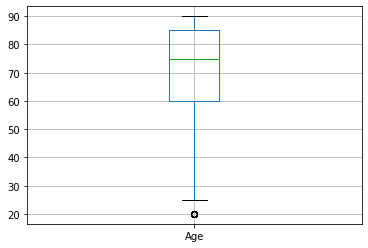

In [ ]:
data.boxplot("Age")

Drop Variant Index and Lifecycle:transition

In [ ]:
data2 = data.drop(columns='Variant index')
display(data2)
data3 = data2.drop(columns='lifecycle:transition')
display(data3)
#data3.to_csv('test1.csv')

,Case ID,Activity,Complete Timestamp,Variant,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,complete,A,True,True,True,True,True,True,True,True,85.0,True,False,False,False,True,True,True,True,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,KNA,CRP,2014-12-16 13:00:00.000,Variant 846,complete,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
15210,KNA,Release A,2014-12-16 23:00:00.000,Variant 846,complete,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15211,LNA,ER Registration,2014-12-03 16:50:28.000,Variant 1,complete,L,False,False,False,False,False,False,False,False,50.0,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,NaN,NaN,NaN
15212,LNA,ER Triage,2014-12-03 16:54:19.000,Variant 1,complete,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Case ID,Activity,Complete Timestamp,Variant,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,A,True,True,True,True,True,True,True,True,85.0,True,False,False,False,True,True,True,True,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,KNA,CRP,2014-12-16 13:00:00.000,Variant 846,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
15210,KNA,Release A,2014-12-16 23:00:00.000,Variant 846,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15211,LNA,ER Registration,2014-12-03 16:50:28.000,Variant 1,L,False,False,False,False,False,False,False,False,50.0,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,NaN,NaN,NaN
15212,LNA,ER Triage,2014-12-03 16:54:19.000,Variant 1,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check For Duplicate Data

In [ ]:
dups = data3.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data3[data3.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Case ID    Activity       Complete Timestamp  ... Leucocytes CRP LacticAcid
7161      ES  Leucocytes  2014-11-08 11:50:00.000  ...       12.6 NaN        NaN

[1 rows x 32 columns]


In [ ]:
# Remove Duplicate Data 
data3 = data3.drop_duplicates()
dups = data3.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Check For Missing Values

In [ ]:
print('Number of instances = %d' % (data3.shape[0]))
print('Number of attributes = %d' % (data3.shape[1]))

print('Number of missing values:')
for col in data3.columns:
    print('\t%s: %d' % (col,data3[col].isna().sum()))

Number of instances = 15213
Number of attributes = 32
Number of missing values:
	Case ID: 24
	Activity: 0
	Complete Timestamp: 0
	Variant: 0
	org:group: 0
	InfectionSuspected: 14163
	DiagnosticBlood: 14163
	DisfuncOrg: 14163
	SIRSCritTachypnea: 14163
	Hypotensie: 14163
	SIRSCritHeartRate: 14163
	Infusion: 14163
	DiagnosticArtAstrup: 14163
	Age: 14163
	DiagnosticIC: 14163
	DiagnosticSputum: 14163
	DiagnosticLiquor: 14163
	DiagnosticOther: 14163
	SIRSCriteria2OrMore: 14163
	DiagnosticXthorax: 14163
	SIRSCritTemperature: 14163
	DiagnosticUrinaryCulture: 14163
	SIRSCritLeucos: 14163
	Oligurie: 14163
	DiagnosticLacticAcid: 14163
	Diagnose: 14417
	Hypoxie: 14163
	DiagnosticUrinarySediment: 14163
	DiagnosticECG: 14163
	Leucocytes: 11853
	CRP: 12090
	LacticAcid: 13759


To CSV

In [ ]:
data3.to_csv('Sepsis_Pre-processed.csv')